# Data Exploration

By Koh Hui Lyn (p2021672)
<br>DAAA/2A05

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Hui Lyn\Documents\sp\machine learning\CA2\datasets\train.csv")
df.head()

,Date,T,RH,Gas,Value
0,10/3/2004,12.020833,54.883334,CO,1316.500000
1,11/3/2004,9.833333,64.069791,CO,1244.062500
2,12/3/2004,11.292708,51.107292,CO,1281.562500
3,13/3/2004,12.866319,51.530903,CO,1330.555556
4,14/3/2004,16.016667,48.843750,CO,1360.927083


In [4]:
#Setting the index to be Date
df.index = pd.to_datetime(df.Date , format = '%d/%m/%Y')
df.drop('Date',axis = 1, inplace = True)
df.head()

,T,RH,Gas,Value
Date,,,,
2004-03-10,12.020833,54.883334,CO,1316.500000
2004-03-11,9.833333,64.069791,CO,1244.062500
2004-03-12,11.292708,51.107292,CO,1281.562500
2004-03-13,12.866319,51.530903,CO,1330.555556
2004-03-14,16.016667,48.843750,CO,1360.927083


In [5]:
#Looking for null values
df.isnull().sum()

T        0
RH       0
Gas      0
Value    0
dtype: int64

In [6]:
#Looking to see how many unique gas types inside
df['Gas'].unique()

array(['CO', 'NMHC', 'NOx', 'O3'], dtype=object)

In [7]:
df_test = pd.read_csv(r"C:\Users\Hui Lyn\Documents\sp\machine learning\CA2\datasets\test.csv")
df_test.head()

,id,Date,T,RH,Gas
0,0,1/2/2005,6.616667,51.734375,CO
1,1,2/2/2005,7.613194,43.930903,CO
2,2,3/2/2005,7.252083,50.966667,CO
3,3,4/2/2005,7.473611,50.166319,CO
4,4,5/2/2005,5.571875,46.604167,CO


In [8]:
#Looking for null values
df_test.isnull().sum()

id      0
Date    0
T       0
RH      0
Gas     0
dtype: int64

In [9]:
#Setting the index to be Date
df_test.index = pd.to_datetime(df_test.Date , format = '%d/%m/%Y')
df_test.drop(['Date','id'],axis = 1, inplace = True)
df_test.head()

,T,RH,Gas
Date,,,
2005-02-01,6.616667,51.734375,CO
2005-02-02,7.613194,43.930903,CO
2005-02-03,7.252083,50.966667,CO
2005-02-04,7.473611,50.166319,CO
2005-02-05,5.571875,46.604167,CO


## Cleaning
There are negative values in RH and Value, which shouldn't be there
There are also some extreme negative values in T so we can remove

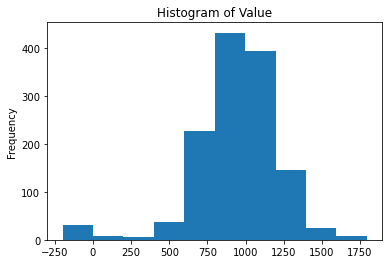

In [10]:
#There are weird values in the Values RH and T
df['Value'].plot(kind='hist')
plt.title("Histogram of Value")
plt.show()

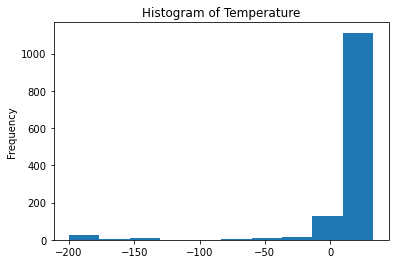

In [11]:
df['T'].plot(kind='hist')
plt.title("Histogram of Temperature")
plt.show()

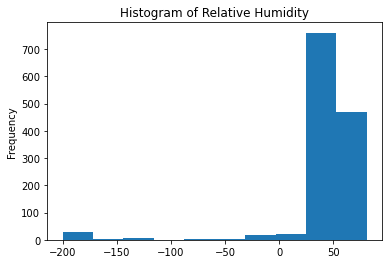

In [12]:
df['RH'].plot(kind='hist')
plt.title("Histogram of Relative Humidity")
plt.show()

In [13]:
#Replacing weird values with previous value for train set
df['Value'] = np.where(df['Value']<0, np.nan, df['Value'])
df['Value'] = df['Value'].fillna(method='ffill')

df['RH'] = np.where(df['RH']<0, np.nan, df['RH'])
df['RH'] = df['RH'].fillna(method='ffill')

df['T'] = np.where(df['T']<-25, np.nan, df['T'])
df['T'] = df['T'].fillna(method='ffill')

In [14]:
#Replacing weird values with previous value for pred set
df_test['RH'] = np.where(df_test['RH']<0, np.nan, df_test['RH'])
df_test['RH'] = df_test['RH'].fillna(method='ffill')

df_test['T'] = np.where(df_test['T']<-25, np.nan, df_test['T'])
df_test['T'] = df_test['T'].fillna(method='ffill')

# CO

In [15]:
#CO only
CO = df.loc[df['Gas'] == "CO"]
CO = CO.drop(columns=['Gas'])
CO.head()

,T,RH,Value
Date,,,
2004-03-10,12.020833,54.883334,1316.500000
2004-03-11,9.833333,64.069791,1244.062500
2004-03-12,11.292708,51.107292,1281.562500
2004-03-13,12.866319,51.530903,1330.555556
2004-03-14,16.016667,48.843750,1360.927083


From the decomposition plot, can see that it looks stationary, no trend, and there seems to be a seasonality.

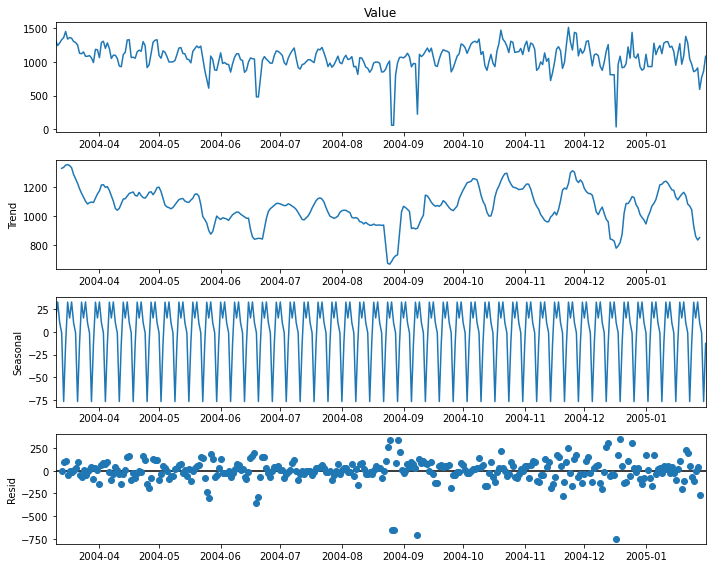

In [16]:
#Decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(CO['Value'], model='additive')
with mp.rc_context():
    mp.rc("figure", figsize=(10,8))
    result.plot()
    plt.show()

From the ACF plot, we can see that it repeats every 7 days

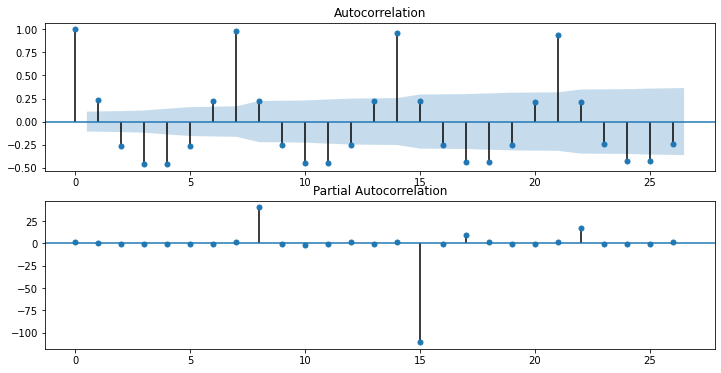

In [17]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(result.seasonal, ax=ax[0])
plot_pacf(result.seasonal, ax=ax[1])
plt.show()

The means of the 2 groups are very similar, however the variances of the two groups are difference.

In [18]:
#Checking to see if it's stationary
CO1 = CO[CO.index<='2004-08-20']
CO2 = CO[CO.index>'2004-08-20']
CO1Mean = CO1['Value'].mean()
CO2Mean = CO2['Value'].mean()
CO1Var = CO1['Value'].var()
CO2Var = CO2['Value'].var()
print(f'Group 1 Mean: {CO1Mean} | Group 2 Mean: {CO2Mean}')
print(f'Group 1 Var: {CO1Var} | Group 2 Var: {CO2Var}')

Group 1 Mean: 1070.539168378049 | Group 2 Mean: 1070.3737084674385
Group 1 Var: 22941.73295164778 | Group 2 Var: 50361.6181277269


To see if it's stationary we can conduct the Augmented Dicky Fuller Test. 
The p-value of CO is 0, which is less than 0.05, we can reject the null hypothesis (H0), the data does not 
have a unit root and is stationary. 

In [19]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(CO['Value'])
print('p-val of CO: %f' % result1[1])

p-val of CO: 0.000000


## CO ACF PACF plot
For the SARIMAX(p,d,q) 
<br>From ACF Plot: q=1 or q=2
<br>From PACF Plot: p=1
<br>Since we didn't do differencing, d=0
<br>From the first ACF plot, the seasonality is 7
<br>Trend = 'n' as from the decomposition we saw no trend

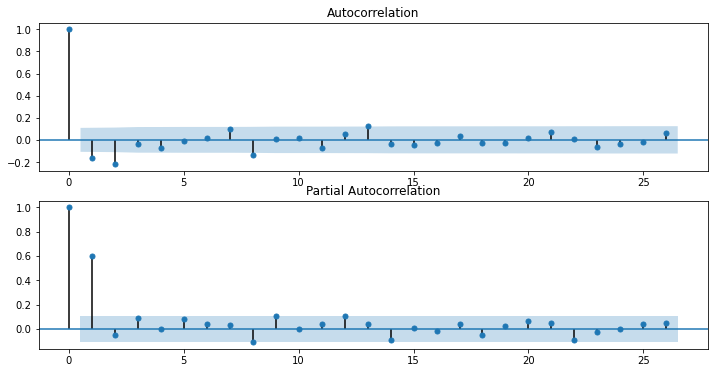

In [20]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(CO['Value'].diff()[1:], ax=ax[0])
plot_pacf(CO['Value'], ax=ax[1])
plt.show()

## Sarimax Gridsearch
Not going to use ARIMA as this data has seasonality

In [21]:
#Split into test and train
train_data = CO[CO.index<='2004-08-20']
test_data = CO[CO.index>'2004-08-20']


In [22]:
#Params for gridsearch
orders = [(1,0,1),(1,0,2)]
seasonal_orders = [(1,0,0,7),(0,0,1,7),(1,0,1,7)]
trainExog = train_data[['T','RH']]
predExog = test_data[['T','RH']]

In [ ]:
# SARIMAX modeel with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['model', 'RMSE_train', 'RMSE_test', 'AIC'])

for order in orders:
    for seasonal_order in seasonal_orders:
        print("trying "+str(order),str(seasonal_order))
        try:
            arima_model = SARIMAX(train_data['Value'], order=order,
                          seasonal_order=seasonal_order,
                          trend='n', exog=trainExog).fit()
        
            pred = arima_model.get_prediction(start='2004-03-10', end='2005-01-31', exog=predExog).predicted_mean
            prediction_df[f'{order},{seasonal_order}'] = pred

            rmse_train = round(mean_squared_error(train_data['Value'], pred[pred.index<='2004-08-20'], squared=False), 2)
            rmse_test = round(mean_squared_error(test_data['Value'], pred[pred.index>'2004-08-20'], squared=False), 2)
            metrics_df = metrics_df.append({'model': f'{order},{seasonal_order}', 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'AIC': arima_model.aic}, ignore_index=True)
        except:
            print("LU decomposition error.")

In [ ]:
metrics_df = metrics_df.sort_values('RMSE_test')
metrics_df

,model,RMSE_train,RMSE_test,AIC
4,"(1, 0, 2),(0, 0, 1, 7)",129.42,276.02,1959.447640
3,"(1, 0, 2),(1, 0, 0, 7)",129.22,285.72,1957.858868
2,"(1, 0, 1),(1, 0, 1, 7)",126.87,312.72,1966.036172
5,"(1, 0, 2),(1, 0, 1, 7)",127.05,342.48,1951.480461
1,"(1, 0, 1),(0, 0, 1, 7)",133.88,590.94,1989.096759
0,"(1, 0, 1),(1, 0, 0, 7)",132.99,621.51,1986.507799


## Sarimax Model

In [23]:
exogCO = CO[['T','RH']]

In [21]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(CO['Value'], order=(1,0,2),
                      seasonal_order=(0, 0, 1, 7), trend='n',exog=exogCO).fit()
arima_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Value   No. Observations:                  328
Model:             SARIMAX(1, 0, 2)x(0, 0, [1], 7)   Log Likelihood               -2103.510
Date:                             Thu, 12 Aug 2021   AIC                           4221.021
Time:                                     14:06:55   BIC                           4247.572
Sample:                                 03-10-2004   HQIC                          4231.614
                                      - 01-31-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              4.3481      1.671      2.602      0.009       1.072       7.624
RH             3.3669      0.969      3.473      0.001       1.467       5.267
ar.L1          1.0000   1.91e-05   5.23e+04      0.000       1.000       1.000
ma.L1         -0.4440      0.030    -14.618      0.000      -0.504      -0.384
ma.L2         -0.4435      0.048     -9.165      0.000      -0.538      -0.349
ma.S.L7        0.0331      0.061      0.539      0.590      -0.087       0.153
sigma2      2.139e+04      0.000   1.51e+08      0.000    2.14e+04    2.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):              1738.25
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.64e+23. Standard errors may be unstable.
"""

The predictions seem to mostly fit the plot, ie increase when the training increase, and decreases when the training decreases

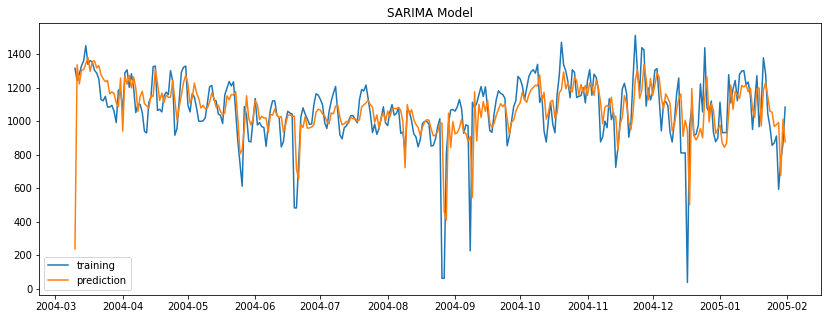

In [22]:
pred = arima_model.get_prediction().predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(CO['Value'], label='training')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [23]:
#CO Test set
CO_test = df_test.loc[df_test['Gas'] == "CO"]
CO_test = CO_test.drop(columns=['Gas'])

The forecast has been made together with a confidence interval!!
<br>This means that the actual pollution value can be higher or lower than the yellow forecast line, but should fall in range of the Confidence interval

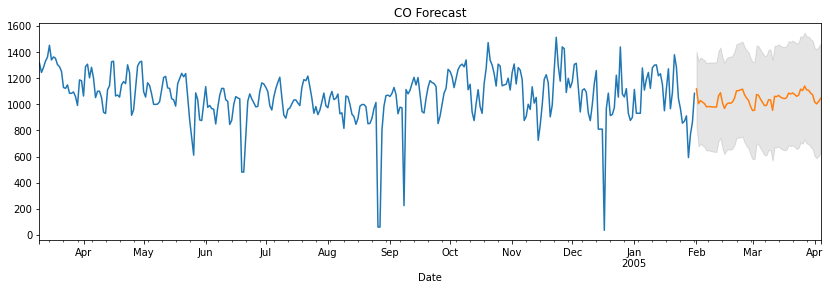

In [24]:
#Forecast plot
forecast = arima_model.get_forecast(steps=63, exog=CO_test)
#confidence intervals
fore_ci = forecast.conf_int()
ax = CO['Value'].plot(label='observed', figsize=(14, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fore_ci.index,
                fore_ci.iloc[:, 0],
                fore_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
plt.title("CO Forecast")
plt.show()

##Trying Auto Arima

In [35]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data['Value'], seasonal=True, m=52, exog=exogCO)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  164
Model:             SARIMAX(1, 1, 2)x(1, 0, [], 52)   Log Likelihood                -975.227
Date:                             Thu, 12 Aug 2021   AIC                           1960.455
Time:                                     14:21:06   BIC                           1975.923
Sample:                                          0   HQIC                          1966.735
                                             - 164                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3019      0.132      2.293      0.022       0.044       0.560
ma.L1         -0.4399      0.126     -3.486      0.000      -0.687      -0.193
ma.L2         -0.4356      0.092     -4.729      0.000      -0.616      -0.255
ar.S.L52      -0.2653      0.092     -2.893      0.004      -0.445      -0.086
sigma2      8948.1615    680.218     13.155      0.000    7614.958    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               179.44
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.81
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=164)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

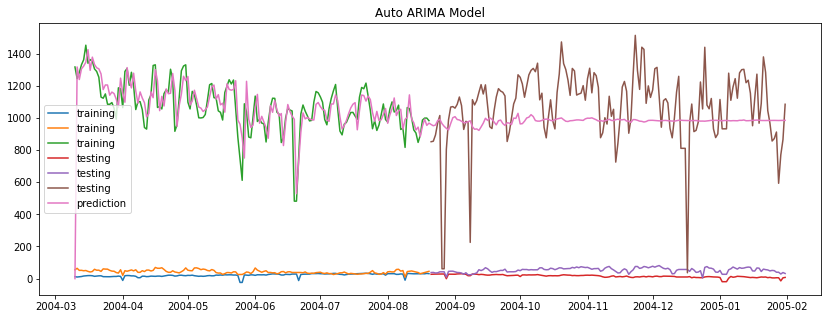

In [44]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(CO.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

# NMHC

In [24]:
#NMHC only
NMHC = df.loc[df['Gas'] == "NMHC"]
NMHC = NMHC.drop(columns=['Gas'])
NMHC.head()

,T,RH,Value
Date,,,
2004-03-10,12.020833,54.883334,912.250000
2004-03-11,9.833333,64.069791,851.802083
2004-03-12,11.292708,51.107292,1008.229167
2004-03-13,12.866319,51.530903,992.822917
2004-03-14,16.016667,48.843750,943.854167


From the decomposition plot, just like CO, it looks stationary, no trend, and there seems to be a seasonality.

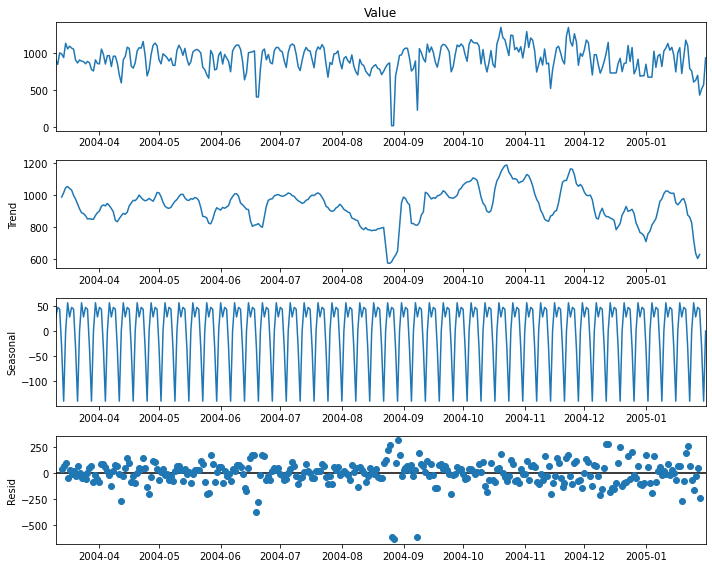

In [25]:
#Decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(NMHC['Value'], model='additive')
with mp.rc_context():
    mp.rc("figure", figsize=(10,8))
    result.plot()
    plt.show()

From the ACF plot, we can see that it repeats every 7 days

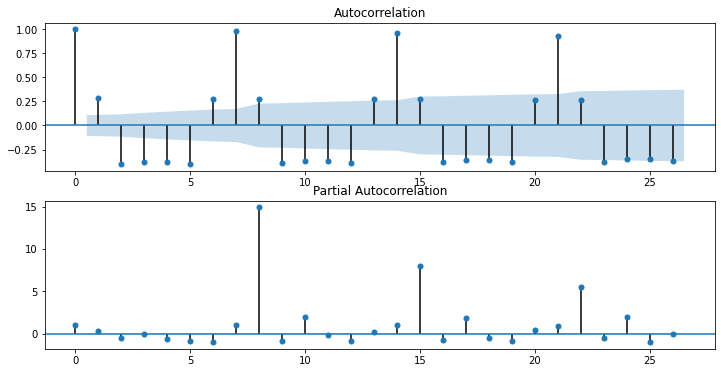

In [26]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(result.seasonal, ax=ax[0])
plot_pacf(result.seasonal, ax=ax[1])
plt.show()

The means of the 2 groups are very similar, however the variances of the two groups are difference.

In [27]:
#Checking to see if it's stationary
NMHC1 = NMHC[NMHC.index<='2004-08-20']
NMHC2 = NMHC[NMHC.index>'2004-08-20']
NMHC1Mean = NMHC1['Value'].mean()
NMHC2Mean = NMHC2['Value'].mean()
NMHC1Var = NMHC1['Value'].var()
NMHC2Var = NMHC2['Value'].var()
print(f'Group 1 Mean: {NMHC1Mean} | Group 2 Mean: {NMHC2Mean}')
print(f'Group 1 Var: {NMHC1Var} | Group 2 Var: {NMHC2Var}')

Group 1 Mean: 927.1287474780488 | Group 2 Mean: 935.2943978857321
Group 1 Var: 18221.094232581694 | Group 2 Var: 44850.85838559505


The p-value of NMHC is 0.000069, which is less than 0.05, we can reject the null hypothesis (H0), the data does not 
have a unit root and is stationary. 

In [28]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(NMHC['Value'])
print('p-val of NMHC: %f' % result1[1])

p-val of NMHC: 0.000069


## NMHC ACF PACF plot
For the SARIMAX(p,d,q) 
<br>From ACF Plot: q=1 or q=2
<br>From PACF Plot: p=1 or p=2
<br>Since we didn't do differencing, d=0
<br>From the first ACF plot, the seasonality is 7
<br>Trend = 'n' as from the decomposition we saw no trend

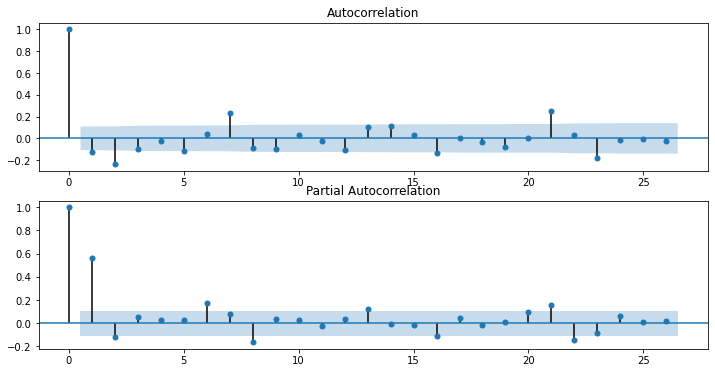

In [29]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(NMHC['Value'].diff()[1:], ax=ax[0])
plot_pacf(NMHC['Value'], ax=ax[1])
plt.show()

## Sarimax Gridsearch
Not going to use ARIMA as this data has seasonality

In [30]:
#Split into test and train
train_data = NMHC[NMHC.index<='2004-08-20']
test_data = NMHC[NMHC.index>'2004-08-20']


In [86]:
#Params for gridsearch
orders = [(1,0,1),(1,0,2),(2,0,1),(2,0,2)]
seasonal_orders = [(1,0,0,7),(0,0,1,7),(1,0,1,7)]
trainExog = train_data[['T','RH']]
predExog = test_data[['T','RH']]

In [53]:
# SARIMAX model with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['model', 'RMSE_train', 'RMSE_test', 'AIC'])

for order in orders:
    for seasonal_order in seasonal_orders:
        arima_model = SARIMAX(train_data['Value'], order=order,
                      seasonal_order=seasonal_order,
                      trend='n', exog=trainExog).fit()
        
        pred = arima_model.get_prediction(start='2004-03-10', end='2005-01-31', exog=predExog).predicted_mean
        prediction_df[f'{order},{seasonal_order}'] = pred

        rmse_train = round(mean_squared_error(train_data['Value'], pred[pred.index<='2004-08-20'], squared=False), 2)
        rmse_test = round(mean_squared_error(test_data['Value'], pred[pred.index>'2004-08-20'], squared=False), 2)
        metrics_df = metrics_df.append({'model': f'{order},{seasonal_order}', 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'AIC': arima_model.aic}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmo

In [54]:
metrics_df = metrics_df.sort_values('RMSE_test')
metrics_df

,model,RMSE_train,RMSE_test,AIC
10,"(2, 0, 2),(0, 0, 1, 7)",117.72,234.94,1980.608795
4,"(1, 0, 2),(0, 0, 1, 7)",118.01,236.36,1980.265435
2,"(1, 0, 1),(1, 0, 1, 7)",122.38,240.02,1965.029894
3,"(1, 0, 2),(1, 0, 0, 7)",114.99,241.69,1968.328991
8,"(2, 0, 1),(1, 0, 1, 7)",119.41,245.07,1968.099650
7,"(2, 0, 1),(0, 0, 1, 7)",122.37,245.13,1997.707008
9,"(2, 0, 2),(1, 0, 0, 7)",114.84,252.13,1968.382480
1,"(1, 0, 1),(0, 0, 1, 7)",133.54,316.96,2036.036635
11,"(2, 0, 2),(1, 0, 1, 7)",111.45,351.99,1947.260352
5,"(1, 0, 2),(1, 0, 1, 7)",111.20,474.21,1947.671310


## Sarimax Model

In [87]:
exogNMHC = NMHC[['T','RH']]

In [56]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(NMHC['Value'], order=(2,0,2),
                      seasonal_order=(0, 0, 1, 7), trend='n',exog=exogNMHC).fit()
arima_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Value   No. Observations:                  328
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 7)   Log Likelihood               -2105.389
Date:                             Thu, 12 Aug 2021   AIC                           4226.777
Time:                                     14:39:01   BIC                           4257.121
Sample:                                 03-10-2004   HQIC                          4238.884
                                      - 01-31-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T             -2.5738      1.389     -1.854      0.064      -5.295       0.148
RH             3.6430      1.367      2.664      0.008       0.963       6.323
ar.L1          1.3219      0.155      8.554      0.000       1.019       1.625
ar.L2         -0.3220      0.154     -2.084      0.037      -0.625      -0.019
ma.L1         -0.6265      0.151     -4.156      0.000      -0.922      -0.331
ma.L2         -0.2521      0.105     -2.402      0.016      -0.458      -0.046
ma.S.L7        0.2537      0.056      4.537      0.000       0.144       0.363
sigma2      2.632e+04   1464.265     17.975      0.000    2.35e+04    2.92e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               376.29
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.77
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The predictions seem to mostly fit the plot, ie increase when the training increase, and decreases when the training decreases

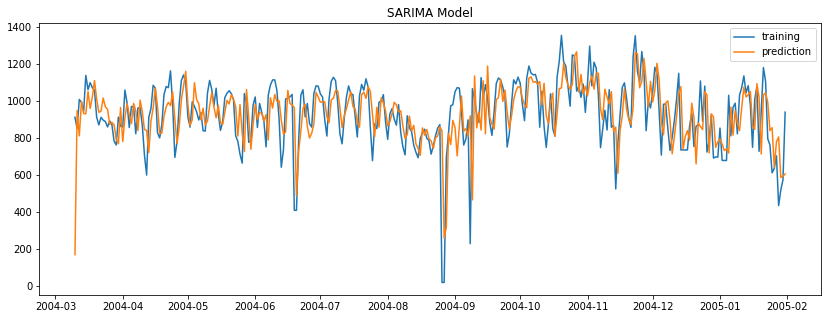

In [57]:
pred = arima_model.get_prediction().predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(NMHC['Value'], label='training')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [58]:
#NMHC Test set
NMHC_test = df_test.loc[df_test['Gas'] == "NMHC"]
NMHC_test = NMHC_test.drop(columns=['Gas'])

The forecast has been made together with a confidence interval!!
<br>This means that the actual pollution value can be higher or lower than the yellow forecast line, but should fall in range of the Confidence interval

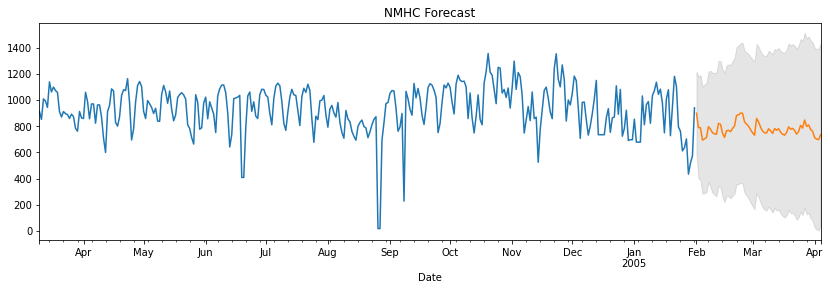

In [59]:
#Forecast plot
forecast = arima_model.get_forecast(steps=63, exog=NMHC_test)
#confidence intervals
fore_ci = forecast.conf_int()
ax = NMHC['Value'].plot(label='observed', figsize=(14, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fore_ci.index,
                fore_ci.iloc[:, 0],
                fore_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
plt.title("NMHC Forecast")
plt.show()

##Trying Auto Arima

In [88]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data['Value'], seasonal=True, m=52, exog=exogNMHC)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 52)   Log Likelihood                -994.872
Date:                            Thu, 12 Aug 2021   AIC                           1997.744
Time:                                    14:50:22   BIC                           2010.143
Sample:                                         0   HQIC                          2002.777
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    927.0599     12.107     76.574      0.000     903.331     950.789
ma.L1          0.6949      0.062     11.188      0.000       0.573       0.817
ma.S.L52      -0.2718      0.120     -2.267      0.023      -0.507      -0.037
sigma2      1.058e+04    950.216     11.130      0.000    8713.929    1.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                62.44
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.73
Prob(H) (two-sided):                  0.87   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=164)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

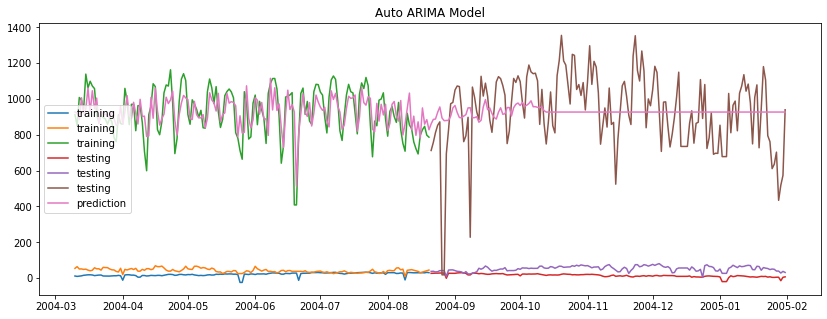

In [93]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(NMHC.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

In [94]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(NMHC['Value'], order=(0,0,1),
                      seasonal_order=(0, 0, 1, 52), trend='n',exog=exogNMHC).fit()
arima_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  328
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 52)   Log Likelihood               -2203.979
Date:                            Thu, 12 Aug 2021   AIC                           4417.957
Time:                                    14:54:52   BIC                           4436.922
Sample:                                03-10-2004   HQIC                          4425.524
                                     - 01-31-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T             11.8810      1.024     11.603      0.000       9.874      13.888
RH            13.6861      0.510     26.856      0.000      12.687      14.685
ma.L1          0.4145      0.040     10.417      0.000       0.336       0.492
ma.S.L52       0.0375      0.066      0.569      0.569      -0.092       0.167
sigma2      4.014e+04   2501.166     16.050      0.000    3.52e+04     4.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               108.81
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.17
Prob(H) (two-sided):                  0.88   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

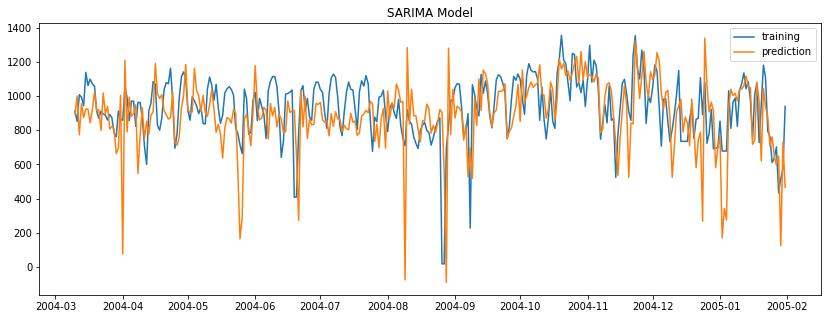

In [95]:
pred = arima_model.get_prediction().predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(NMHC['Value'], label='training')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

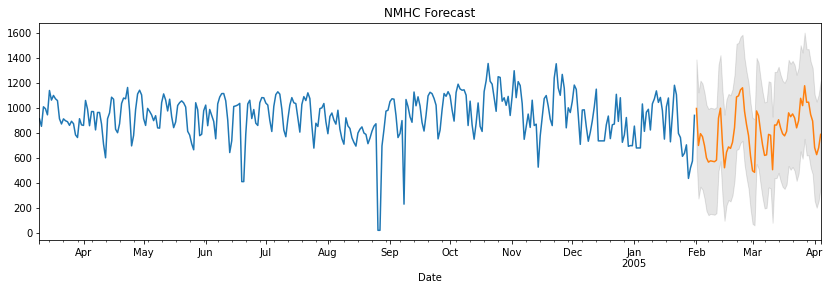

In [96]:
#Forecast plot
forecast = arima_model.get_forecast(steps=63, exog=NMHC_test)
#confidence intervals
fore_ci = forecast.conf_int()
ax = NMHC['Value'].plot(label='observed', figsize=(14, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fore_ci.index,
                fore_ci.iloc[:, 0],
                fore_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
plt.title("NMHC Forecast")
plt.show()

# NOX

In [31]:
#NOX only
NOX = df.loc[df['Gas'] == "NOx"]
NOX = NOX.drop(columns=['Gas'])
NOX.head()

,T,RH,Value
Date,,,
2004-03-10,12.020833,54.883334,1167.250000
2004-03-11,9.833333,64.069791,1277.187500
2004-03-12,11.292708,51.107292,1101.718750
2004-03-13,12.866319,51.530903,993.159722
2004-03-14,16.016667,48.843750,1001.104167


From the decomposition plot, can see that it looks stationary, no trend, and there seems to be a seasonality.

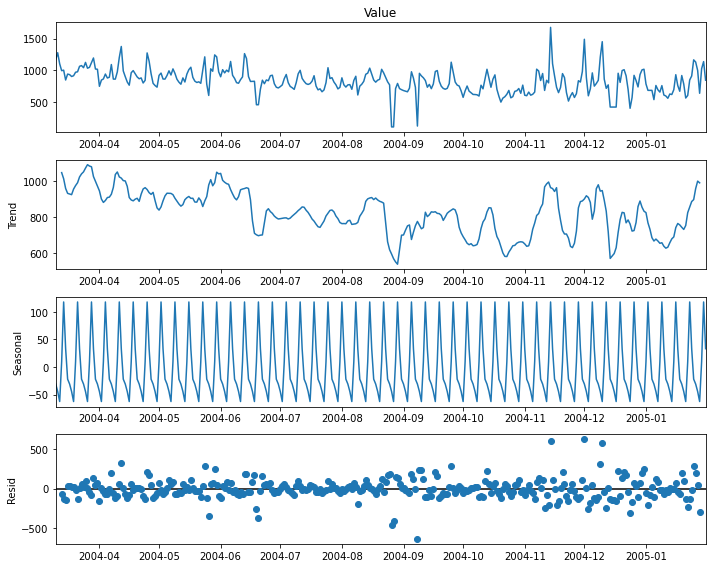

In [32]:
#Decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(NOX['Value'], model='additive')
with mp.rc_context():
    mp.rc("figure", figsize=(10,8))
    result.plot()
    plt.show()

From the ACF plot, we can see that it repeats every 7 days

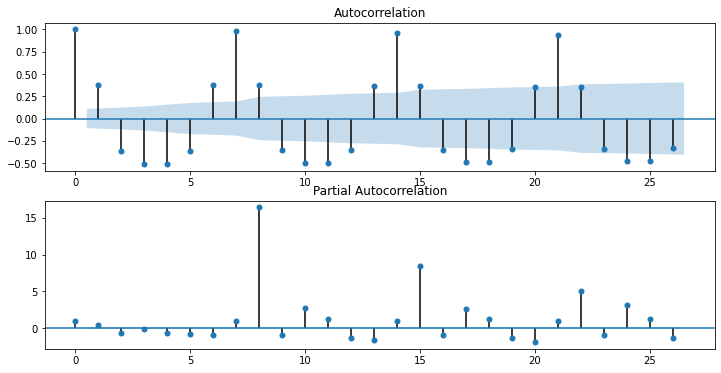

In [33]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(result.seasonal, ax=ax[0])
plot_pacf(result.seasonal, ax=ax[1])
plt.show()

The means of the 2 groups are varies slightly, and the variances of the two groups are difference.

In [34]:
#Checking to see if it's stationary
NOX1 = NOX[NOX.index<='2004-08-20']
NOX2 = NOX[NOX.index>'2004-08-20']
NOX1Mean = NOX1['Value'].mean()
NOX2Mean = NOX2['Value'].mean()
NOX1Var = NOX1['Value'].var()
NOX2Var = NOX2['Value'].var()
print(f'Group 1 Mean: {NOX1Mean} | Group 2 Mean: {NOX2Mean}')
print(f'Group 1 Var: {NOX1Var} | Group 2 Var: {NOX2Var}')

Group 1 Mean: 893.9887576182923 | Group 2 Mean: 764.4000889152445
Group 1 Var: 22362.464254576455 | Group 2 Var: 45077.438369994285


However, the p-value of CO is 0, which is less than 0.05, we can reject the null hypothesis (H0), the data does not 
have a unit root and is stationary. 

In [35]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(NOX['Value'])
print('p-val of NOX: %f' % result1[1])

p-val of NOX: 0.000000


## NOx ACF PACF plot
For the SARIMAX(p,d,q) 
<br>From ACF Plot: q=1, q=2 or q=3
<br>From PACF Plot: p=1, p=2
<br>Since we didn't do differencing, d=0
<br>From the first ACF plot, the seasonality is 7
<br>Trend = 'n' as from the decomposition we saw no trend

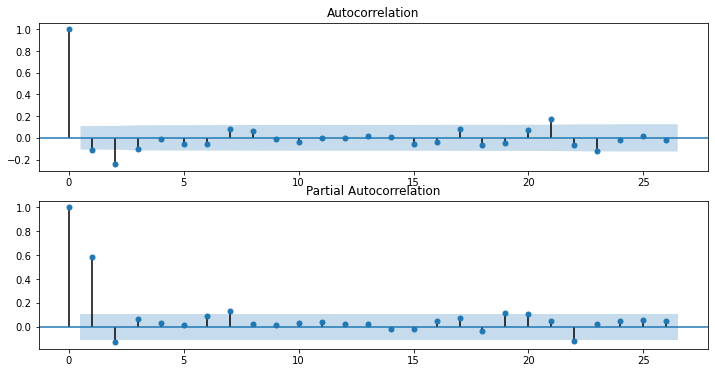

In [36]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(NOX['Value'].diff()[1:], ax=ax[0])
plot_pacf(NOX['Value'], ax=ax[1])
plt.show()

## Sarimax Gridsearch
Not going to use ARIMA as this data has seasonality

In [37]:
#Split into test and train
train_data = NOX[NOX.index<='2004-08-20']
test_data = NOX[NOX.index>'2004-08-20']


In [70]:
#Params for gridsearch
orders = [(1,0,1),(1,0,2),(1,0,3),(2,0,1),(2,0,2),(2,0,3)]
seasonal_orders = [(1,0,0,7),(0,0,1,7),(1,0,1,7)]
trainExog = train_data[['T','RH']]
predExog = test_data[['T','RH']]

In [63]:
# SARIMAX model with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['model', 'RMSE_train', 'RMSE_test', 'AIC'])

for order in orders:
    for seasonal_order in seasonal_orders:
        arima_model = SARIMAX(train_data['Value'], order=order,
                      seasonal_order=seasonal_order,
                      trend='n', exog=trainExog).fit()
        
        pred = arima_model.get_prediction(start='2004-03-10', end='2005-01-31', exog=predExog).predicted_mean
        prediction_df[f'{order},{seasonal_order}'] = pred

        rmse_train = round(mean_squared_error(train_data['Value'], pred[pred.index<='2004-08-20'], squared=False), 2)
        rmse_test = round(mean_squared_error(test_data['Value'], pred[pred.index>'2004-08-20'], squared=False), 2)
        metrics_df = metrics_df.append({'model': f'{order},{seasonal_order}', 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'AIC': arima_model.aic}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmo

In [64]:
metrics_df = metrics_df.sort_values('RMSE_test')
metrics_df

,model,RMSE_train,RMSE_test,AIC
15,"(2, 0, 3),(1, 0, 0, 7)",114.16,201.35,1999.892500
7,"(1, 0, 3),(0, 0, 1, 7)",117.71,224.44,1981.063259
13,"(2, 0, 2),(0, 0, 1, 7)",117.72,234.94,1980.608795
17,"(2, 0, 3),(1, 0, 1, 7)",112.43,235.94,1961.485884
4,"(1, 0, 2),(0, 0, 1, 7)",118.01,236.36,1980.265435
6,"(1, 0, 3),(1, 0, 0, 7)",114.81,239.25,1968.564372
2,"(1, 0, 1),(1, 0, 1, 7)",122.38,240.02,1965.029894
3,"(1, 0, 2),(1, 0, 0, 7)",114.99,241.69,1968.328991
11,"(2, 0, 1),(1, 0, 1, 7)",119.41,245.07,1968.099650
10,"(2, 0, 1),(0, 0, 1, 7)",122.37,245.13,1997.707008


## Sarimax Model

In [75]:
exogNOX = NOX[['T','RH']]

In [ ]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(NOX['Value'], order=(1,0,2),
                      seasonal_order=(1, 0, 1, 7), trend='n',exog=exogNOX).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Value   No. Observations:                  328
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -2116.171
Date:                             Thu, 12 Aug 2021   AIC                           4248.342
Time:                                     21:44:28   BIC                           4278.686
Sample:                                 03-10-2004   HQIC                          4260.448
                                      - 01-31-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              1.8398      0.910      2.022      0.043       0.056       3.623
RH            -1.8073      0.767     -2.357      0.018      -3.310      -0.304
ar.L1          1.0000   5.89e-05    1.7e+04      0.000       1.000       1.000
ma.L1         -0.4574      0.037    -12.371      0.000      -0.530      -0.385
ma.L2         -0.4720      0.041    -11.457      0.000      -0.553      -0.391
ar.S.L7        0.9998      0.001   1897.004      0.000       0.999       1.001
ma.S.L7       -0.9947      0.008   -120.628      0.000      -1.011      -0.979
sigma2      2.226e+04    951.489     23.397      0.000    2.04e+04    2.41e+04
===================================================================================
Ljung-Box (Q):                       41.31   Jarque-Bera (JB):               679.59
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The predictions seem to mostly fit the plot, ie increase when the training increase, and decreases when the training decreases

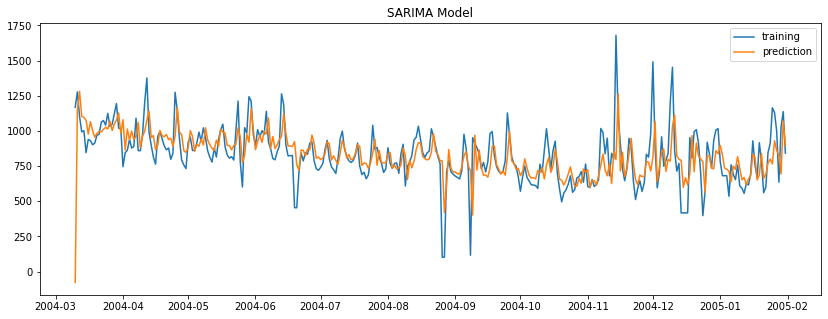

In [ ]:
pred = arima_model.get_prediction().predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(NOX['Value'], label='training')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [ ]:
#CO Test set
NOX_test = df_test.loc[df_test['Gas'] == "NOx"]
NOX_test = NOX_test.drop(columns=['Gas'])

The forecast has been made together with a confidence interval!!
<br>This means that the actual pollution value can be higher or lower than the yellow forecast line, but should fall in range of the Confidence interval

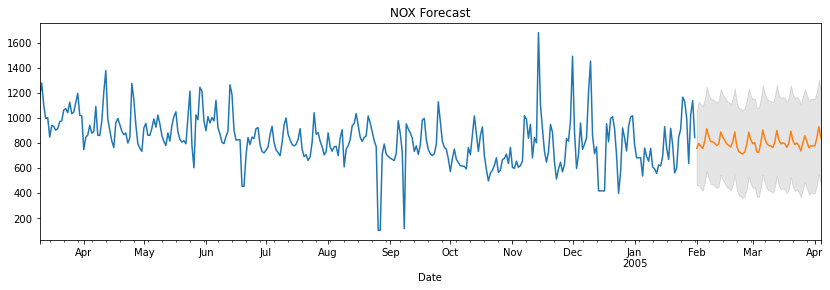

In [ ]:
#Forecast plot
forecast = arima_model.get_forecast(steps=63, exog=NOX_test)
#confidence intervals
fore_ci = forecast.conf_int()
ax = NOX['Value'].plot(label='observed', figsize=(14, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fore_ci.index,
                fore_ci.iloc[:, 0],
                fore_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
plt.title("NOX Forecast")
plt.show()

##Trying Auto Arima

In [76]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data['Value'], seasonal=True, m=52, exog=exogNOX)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  164
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1024.468
Date:                Thu, 12 Aug 2021   AIC                           2050.937
Time:                        14:44:57   BIC                           2054.030
Sample:                             0   HQIC                          2052.193
                                - 164                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.685e+04   1331.425     12.658      0.000    1.42e+04    1.95e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                25.38
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=164)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

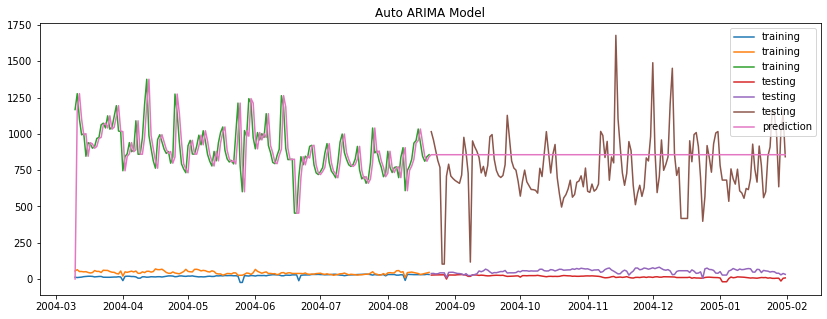

In [78]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(CO.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

# O3

In [102]:
#O3 only
O3 = df.loc[df['Gas'] == "O3"]
O3 = O3.drop(columns=['Gas'])
O3.head()

,T,RH,Value
Date,,,
2004-03-10,12.020833,54.883334,1096.041667
2004-03-11,9.833333,64.069791,885.031250
2004-03-12,11.292708,51.107292,1084.218750
2004-03-13,12.866319,51.530903,1245.781250
2004-03-14,16.016667,48.843750,1234.177083


From the decomposition plot, can see that it looks stationary, no trend, and there seems to be a seasonality.

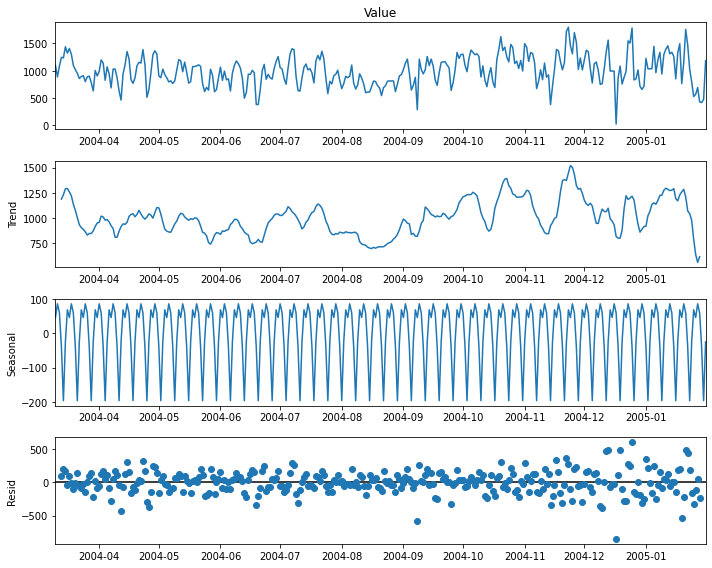

In [103]:
#Decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(O3['Value'], model='additive')
with mp.rc_context():
    mp.rc("figure", figsize=(10,8))
    result.plot()
    plt.show()

From the ACF plot, we can see that it repeats every 7 days

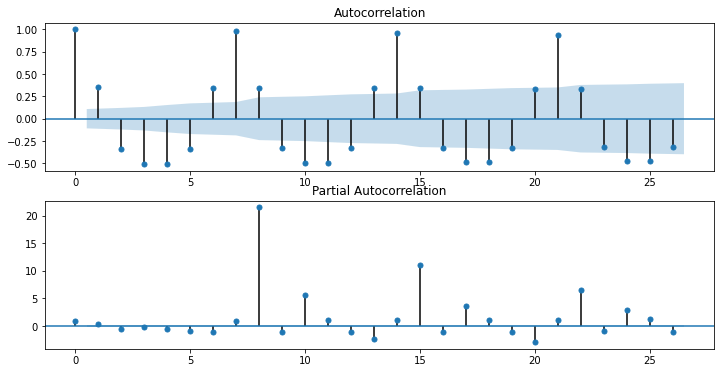

In [104]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(result.seasonal, ax=ax[0])
plot_pacf(result.seasonal, ax=ax[1])
plt.show()

The means of the 2 groups are different, and the variances of the two groups are different.

In [105]:
#Checking to see if it's stationary
O31 = O3[O3.index<='2004-08-20']
O32 = O3[O3.index>'2004-08-20']
O31Mean = O31['Value'].mean()
O32Mean = O32['Value'].mean()
O31Var = O31['Value'].var()
O32Var = O32['Value'].var()
print(f'Group 1 Mean: {O31Mean} | Group 2 Mean: {O32Mean}')
print(f'Group 1 Var: {O31Var} | Group 2 Var: {O32Var}')

Group 1 Mean: 938.3956639353662 | Group 2 Mean: 1064.613842263841
Group 1 Var: 48921.53754304662 | Group 2 Var: 94771.4969333681


The p-value of CO is 0, which is less than 0.000273, we can reject the null hypothesis (H0), the data does not 
have a unit root and is stationary. 

In [106]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(O3['Value'])
print('p-val of O3: %f' % result1[1])

p-val of O3: 0.000273


## O3 ACF PACF plot
For the SARIMAX(p,d,q) 
<br>From ACF Plot: q=1 or q=2
<br>From PACF Plot: p=1 or p=2
<br>Since we didn't do differencing, d=0
<br>From the first ACF plot, the seasonality is 7
<br>Trend = 'n' as from the decomposition we saw no trend

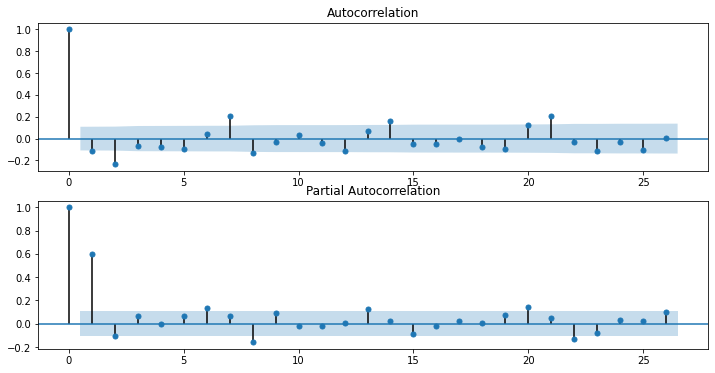

In [107]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(O3['Value'].diff()[1:], ax=ax[0])
plot_pacf(O3['Value'], ax=ax[1])
plt.show()

## Sarimax Gridsearch
Not going to use ARIMA as this data has seasonality

In [108]:
#Split into test and train
train_data = O3[O3.index<='2004-08-20']
test_data = O3[O3.index>'2004-08-20']


In [ ]:
#Params for gridsearch
orders = [(1,0,1),(1,0,2),(2,0,1),(2,0,2)]
seasonal_orders = [(1,0,0,7),(0,0,1,7),(1,0,1,7)]
trainExog = train_data[['T','RH']]
predExog = test_data[['T','RH']]

In [ ]:
# SARIMAX model with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['model', 'RMSE_train', 'RMSE_test', 'AIC'])

for order in orders:
    for seasonal_order in seasonal_orders:
        arima_model = SARIMAX(train_data['Value'], order=order,
                      seasonal_order=seasonal_order,
                      trend='n', exog=trainExog).fit()
        
        pred = arima_model.get_prediction(start='2004-03-10', end='2005-01-31', exog=predExog).predicted_mean
        prediction_df[f'{order},{seasonal_order}'] = pred

        rmse_train = round(mean_squared_error(train_data['Value'], pred[pred.index<='2004-08-20'], squared=False), 2)
        rmse_test = round(mean_squared_error(test_data['Value'], pred[pred.index>'2004-08-20'], squared=False), 2)
        metrics_df = metrics_df.append({'model': f'{order},{seasonal_order}', 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'AIC': arima_model.aic}, ignore_index=True)

In [ ]:
metrics_df = metrics_df.sort_values('RMSE_test')
metrics_df

,model,RMSE_train,RMSE_test,AIC
2,"(1, 0, 1),(1, 0, 1, 7)",180.00,398.10,2134.703543
11,"(2, 0, 2),(1, 0, 1, 7)",168.20,423.99,2134.096487
9,"(2, 0, 2),(1, 0, 0, 7)",178.86,439.62,2141.637268
3,"(1, 0, 2),(1, 0, 0, 7)",182.50,483.51,2148.071457
4,"(1, 0, 2),(0, 0, 1, 7)",184.85,489.40,2151.417416
8,"(2, 0, 1),(1, 0, 1, 7)",173.26,501.88,2124.678782
10,"(2, 0, 2),(0, 0, 1, 7)",188.38,544.68,2174.032270
5,"(1, 0, 2),(1, 0, 1, 7)",173.48,550.45,2134.051982
6,"(2, 0, 1),(1, 0, 0, 7)",193.98,1042.38,2176.006086
1,"(1, 0, 1),(0, 0, 1, 7)",199.84,1045.92,2183.896575


## Sarimax Model

In [109]:
exogO3 = O3[['T','RH']]

In [ ]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(O3['Value'], order=(1,0,1),
                      seasonal_order=(1, 0, 1, 7), trend='n',exog=exogO3).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Value   No. Observations:                  328
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2215.169
Date:                           Thu, 12 Aug 2021   AIC                           4444.338
Time:                                   21:44:35   BIC                           4470.889
Sample:                               03-10-2004   HQIC                          4454.931
                                    - 01-31-2005                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              2.0204      1.911      1.057      0.290      -1.726       5.766
RH             5.3447      1.026      5.208      0.000       3.333       7.356
ar.L1          0.5376      0.072      7.422      0.000       0.396       0.680
ma.L1          0.1345      0.082      1.642      0.101      -0.026       0.295
ar.S.L7        1.0000      0.000   4974.079      0.000       1.000       1.000
ma.S.L7       -0.9917      0.058    -17.194      0.000      -1.105      -0.879
sigma2      3.919e+04      0.000   3.08e+08      0.000    3.92e+04    3.92e+04
===================================================================================
Ljung-Box (Q):                       28.22   Jarque-Bera (JB):                90.42
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.84e+23. Standard errors may be unstable.
"""

The predictions seem to mostly fit the plot, ie increase when the training increase, and decreases when the training decreases

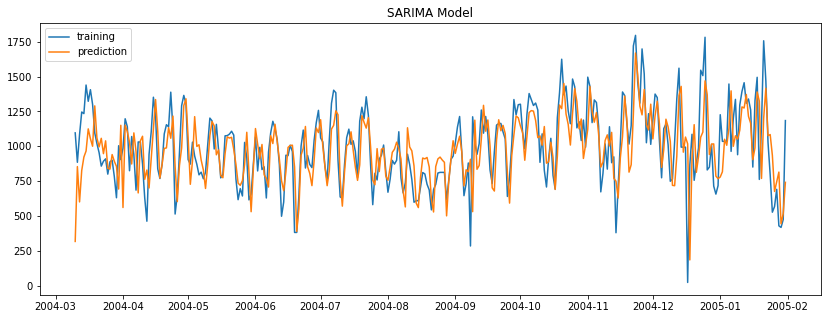

In [ ]:
pred = arima_model.get_prediction().predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(O3['Value'], label='training')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [ ]:
#O3 Test set
O3_test = df_test.loc[df_test['Gas'] == "O3"]
O3_test = O3_test.drop(columns=['Gas'])

The forecast has been made together with a confidence interval!!
<br>This means that the actual pollution value can be higher or lower than the yellow forecast line, but should fall in range of the Confidence interval

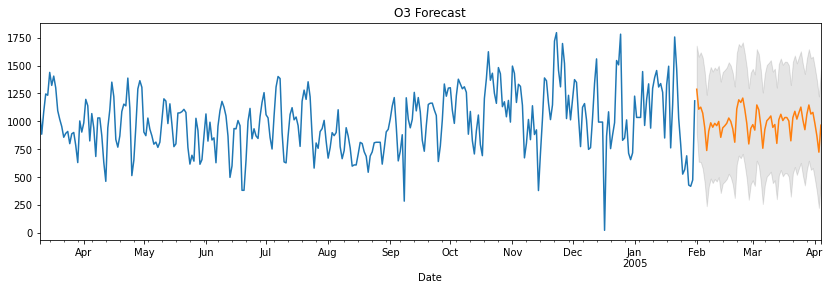

In [ ]:
#Forecast plot
forecast = arima_model.get_forecast(steps=63, exog=O3_test)
#confidence intervals
fore_ci = forecast.conf_int()
ax = O3['Value'].plot(label='observed', figsize=(14, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(fore_ci.index,
                fore_ci.iloc[:, 0],
                fore_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
plt.title("O3 Forecast")
plt.show()

##Trying Auto Arima

In [110]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data['Value'], seasonal=True, m=52, exog=exogO3)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  164
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood               -1065.814
Date:                             Thu, 12 Aug 2021   AIC                           2141.629
Time:                                     15:05:40   BIC                           2157.128
Sample:                                          0   HQIC                          2147.921
                                             - 164                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    856.3350    155.908      5.493      0.000     550.761    1161.909
ar.L1          0.2889      0.109      2.659      0.008       0.076       0.502
ma.L1          0.5207      0.092      5.676      0.000       0.341       0.700
ar.S.L52      -0.2877      0.084     -3.410      0.001      -0.453      -0.122
sigma2      2.494e+04   3101.852      8.040      0.000    1.89e+04     3.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.98   Prob(JB):                         0.75
Heteroskedasticity (H):               0.69   Skew:                             0.02
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=164)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

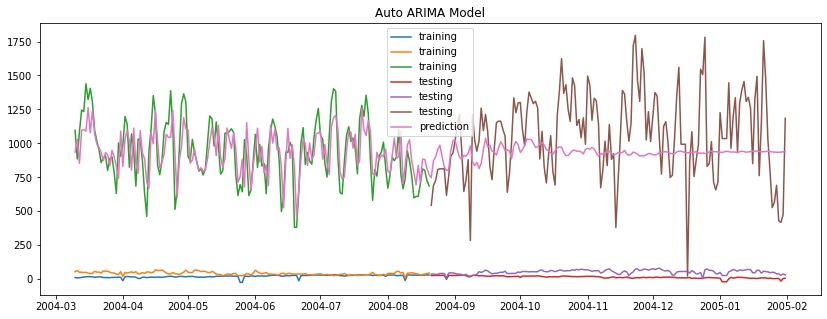

In [112]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(O3.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()